<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/Develop_a_Model_of_Diamond_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load the datset

In [3]:
df =pd.read_csv('/content/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# bulid a baseline2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with price and build a StatsModels

 linear regression model using just that feature.



In [4]:
pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4d232de20ede5ae7319fd447bf65509bb7170bdb3c931493bb7db32f665f05d3
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="My Data Report", explorative=True)
profile.to_file('diamond.html')  # show in notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 11/11 [00:00<00:00, 16.01it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# the feature that affects the price is
#carat
#x , y and z

#Plotting the Predictor vs. Price





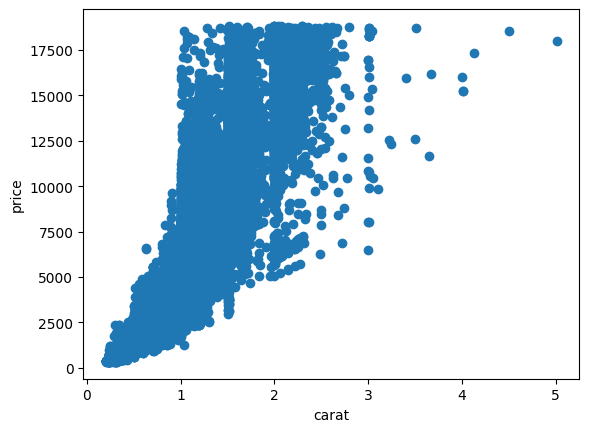

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['carat'], df['price'])
plt.xlabel('carat')
plt.ylabel('price')
plt.show()


setting the variables as x_baseline and y

In [8]:
x_baseline = df['carat']
y = df['price']

#Creating and Fitting Simple Linear Regression

#The following code uses your variables to build and fit a simple linear regression.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_baseline.values.reshape(-1, 1), y)



LinearRegression()

#3. Evaluate and Interpret Baseline Model Results

import the required files

In [10]:
from sklearn.metrics import mean_squared_error, r2_score # fixed the typo here by removing y from r2_scorey
y_predict = model.predict(x_baseline.values.reshape(-1, 1))
mse = mean_squared_error(y, y_predict) # fixed the typo by changing mean_squared_array to mean_squared_error
r2 = r2_score(y, y_predict)
print('MSE:', mse)
print('R2:', r2)

MSE: 2397955.0500126793
R2: 0.8493305264354858


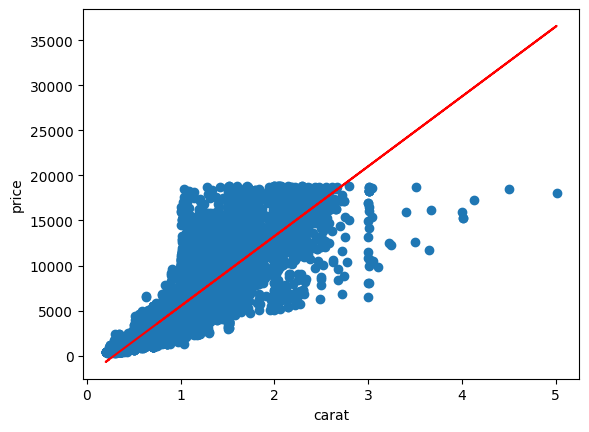

In [11]:
plt.scatter(x_baseline, y)
plt.plot(x_baseline, y_predict, color='red')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## PREPARE A CATEGORICAL FEATURE FOR MULTI REGRESSION MODELLING

IDDENTIfy a promising indicator

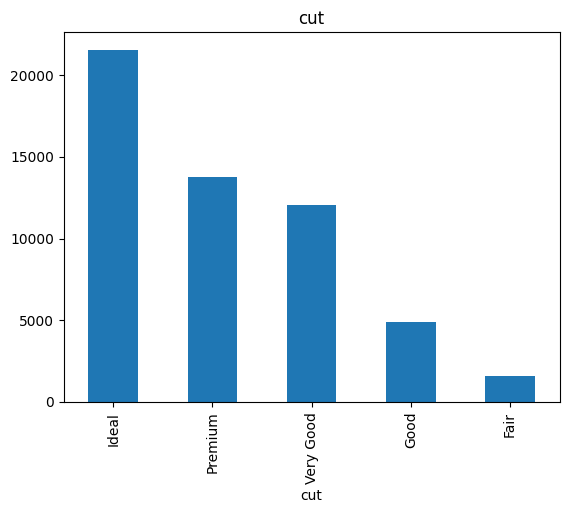

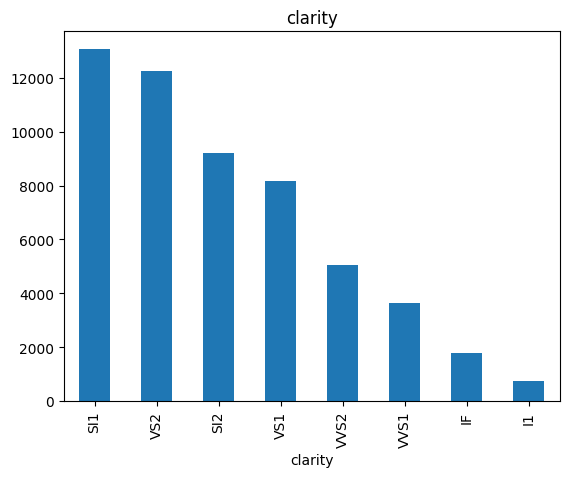

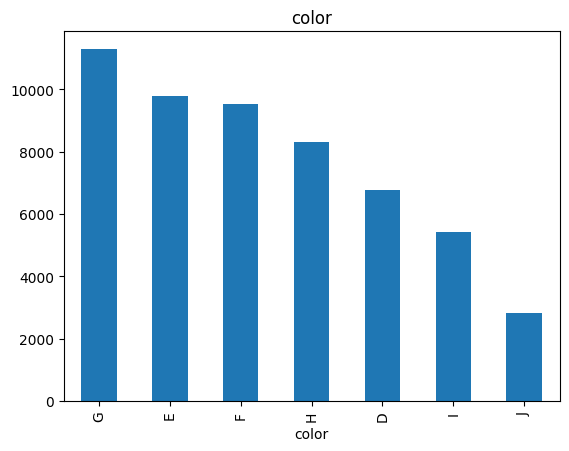

In [13]:
# Below we create bar graphs for the categories present in each categorical feature:
cat_cols = ['cut', 'clarity','color'] # Define cat_cols to hold the list of categorical columns
for col in cat_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

# preprocessing  categorical variablePreprocessing Categorical Variable
If we tried to pass X_iterated as-is into sm.OLS, we would get an error.

 We need to use pd.get_dummies to create dummy variables for cat_col.

DO NOT use drop_first=True, so that you can intentionally set a meaningful reference category instead

In [14]:
cat_cols = ['cut', 'clarity','color']
X_iterated = pd.get_dummies(df, columns=cat_cols)
X_iterated.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,...,False,False,False,False,True,False,False,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,False,True,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,...,False,False,False,False,False,False,False,False,False,True


In [19]:
df['cut'].value_counts()
X_iterated = pd.get_dummies(X, columns=['cut'], drop_first=False)
X_iterated.head()

NameError: name 'X' is not defined

In [20]:
df['cut'].value_counts()
X_iterated = pd.get_dummies(df, columns=['cut'], drop_first=False) # Changed X to df
X_iterated.head()

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,1,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,False,False,True,False,False
1,2,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,False,False,False,True,False
2,3,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31,False,True,False,False,False
3,4,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,False,False,False,True,False
4,5,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,False,True,False,False,False


In [21]:
df['cut'].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [22]:
X_iterated = pd.get_dummies(df.drop(columns=['price']), columns=['cut'], drop_first=False)
X_iterated = X_iterated.drop(columns=['cut_Very Good'])


In [25]:
df['clarity'].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


In [26]:
X_iterated = X_iterated.drop(columns=['clarity_SI1'])

KeyError: "['clarity_SI1'] not found in axis"

In [28]:
print(X_iterated.columns.tolist())

['Unnamed: 0', 'carat', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium']


In [29]:
cat_cols = ['cut', 'clarity','color']
X_iterated = pd.get_dummies(df, columns=cat_cols)
X_iterated.head()

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
2,3,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,...,False,False,False,False,True,False,False,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,False,True,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,...,False,False,False,False,False,False,False,False,False,True


In [30]:
cat_cols = ['cut', 'clarity', 'color']
X_iterated = pd.get_dummies(df.drop(columns=['price', 'Unnamed: 0']), columns=cat_cols, drop_first=False)


In [31]:
[col for col in X_iterated.columns if 'clarity' in col]


['clarity_I1',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2']

In [32]:
X_iterated = X_iterated.drop(columns=['clarity_SI1'])


In [33]:
[col for col in X_iterated.columns if 'color' in col]

['color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J']

In [34]:
df['color'].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [35]:
X_iterated = X_iterated.drop(columns=['color_G'])

In [36]:
print(X_iterated)

       carat  depth  table     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0  3.95  3.98  2.43     False     False       True   
1       0.21   59.8   61.0  3.89  3.84  2.31     False     False      False   
2       0.23   56.9   65.0  4.05  4.07  2.31     False      True      False   
3       0.29   62.4   58.0  4.20  4.23  2.63     False     False      False   
4       0.31   63.3   58.0  4.34  4.35  2.75     False      True      False   
...      ...    ...    ...   ...   ...   ...       ...       ...        ...   
53935   0.72   60.8   57.0  5.75  5.76  3.50     False     False       True   
53936   0.72   63.1   55.0  5.69  5.75  3.61     False      True      False   
53937   0.70   62.8   60.0  5.66  5.68  3.56     False     False      False   
53938   0.86   61.0   58.0  6.15  6.12  3.74     False     False      False   
53939   0.75   62.2   55.0  5.83  5.87  3.64     False     False       True   

       cut_Premium  ...  clarity_VS1  clarity_VS2  

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.